# 1. Cleaning and processing data

## 1. Importing libraries

In [12]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## 2. loading data from raw data file structure

In [13]:
csv_data = pd.read_csv('../3_raw_data/csv/latest.csv')
db_data = pd.read_csv('../3_raw_data/db/latest.csv')

print(f"csv data columns {csv_data.columns}")
print(f"db data columns {db_data.columns}")

csv data columns Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')
db data columns Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


## 3. Handling missing values

### 1. csv data

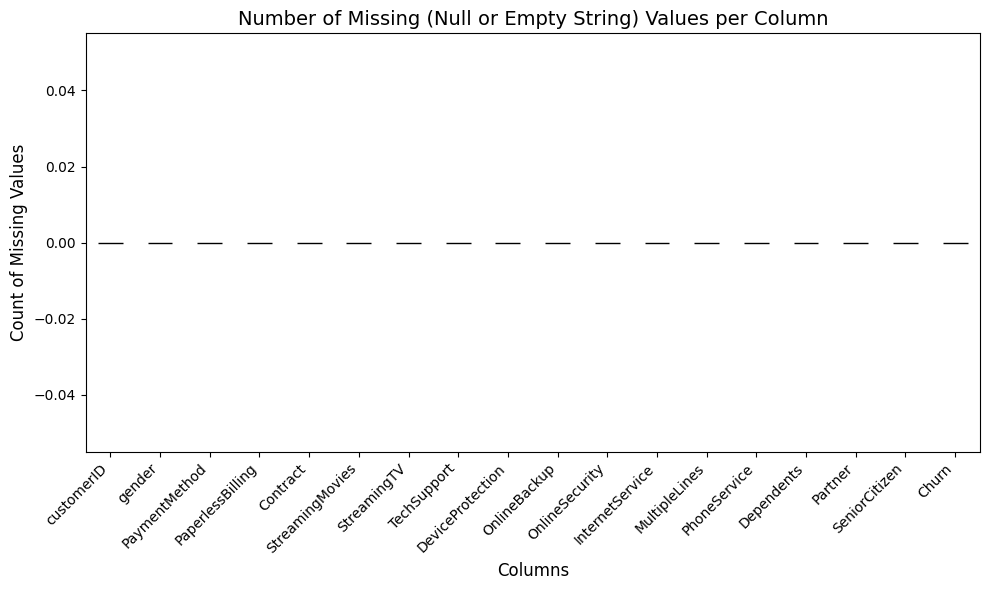

customerID          0
gender              0
PaymentMethod       0
PaperlessBilling    0
Contract            0
dtype: int64

In [14]:
# Strip whitespace and check again
df_stripped = csv_data.map(lambda x: x.strip() if isinstance(x, str) else x)

# Count nulls or empty strings after stripping
null_counts = df_stripped.apply(lambda x: x.eq("").sum() + x.isnull().sum())

# Sort descending
null_counts = null_counts.sort_values(ascending=False)

# Plot again
plt.figure(figsize=(10,6))
null_counts.plot(kind='bar', color='salmon', edgecolor='black')

plt.title("Number of Missing (Null or Empty String) Values per Column", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Count of Missing Values", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

null_counts.head()


### 2. db data

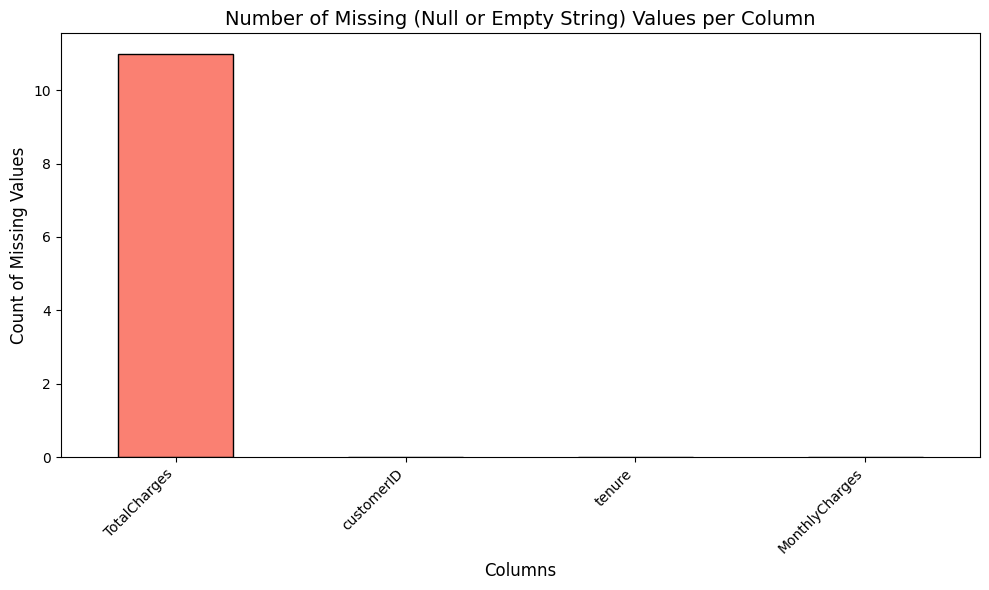

TotalCharges      11
customerID         0
tenure             0
MonthlyCharges     0
dtype: int64

In [15]:
# Strip whitespace and check again
df_stripped = db_data.map(lambda x: x.strip() if isinstance(x, str) else x)

# Count nulls or empty strings after stripping
null_counts = df_stripped.apply(lambda x: x.eq("").sum() + x.isnull().sum())

# Sort descending
null_counts = null_counts.sort_values(ascending=False)

# Plot again
plt.figure(figsize=(10,6))
null_counts.plot(kind='bar', color='salmon', edgecolor='black')

plt.title("Number of Missing (Null or Empty String) Values per Column", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Count of Missing Values", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

null_counts.head()


In [16]:
missing_totalcharges = df_stripped[df_stripped["TotalCharges"].isna() | (df_stripped["TotalCharges"] == "")]

# Show the rows
print(missing_totalcharges)

      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             
3331  7644-OMVMY       0           19.85             
3826  3213-VVOLG       0           25.35             
4380  2520-SGTTA       0           20.00             
5218  2923-ARZLG       0           19.70             
6670  4075-WKNIU       0           73.35             
6754  2775-SEFEE       0           61.90             


1. From the above analysis, we can conclude there are only 11 missing values in "TotalCharges" in db data and no missing values in csv data.
2. We can handle these missing values by dropping those rows since they are only 11 rows and imputation cannot be done because tenure is 0.

## 4. Dropping missing values

In [17]:
# Strip spaces first
db_data["TotalCharges"] = db_data["TotalCharges"].astype(str).str.strip()

# Drop rows where TotalCharges is empty string or NaN
db_data_dropped = db_data[~db_data["TotalCharges"].isna() & (db_data["TotalCharges"] != "")]

# Reset index (optional)
db_data_dropped = db_data_dropped.reset_index(drop=True)

print("Original shape:", db_data.shape)
print("After dropping missing TotalCharges:", db_data_dropped.shape)

Original shape: (7043, 4)
After dropping missing TotalCharges: (7032, 4)


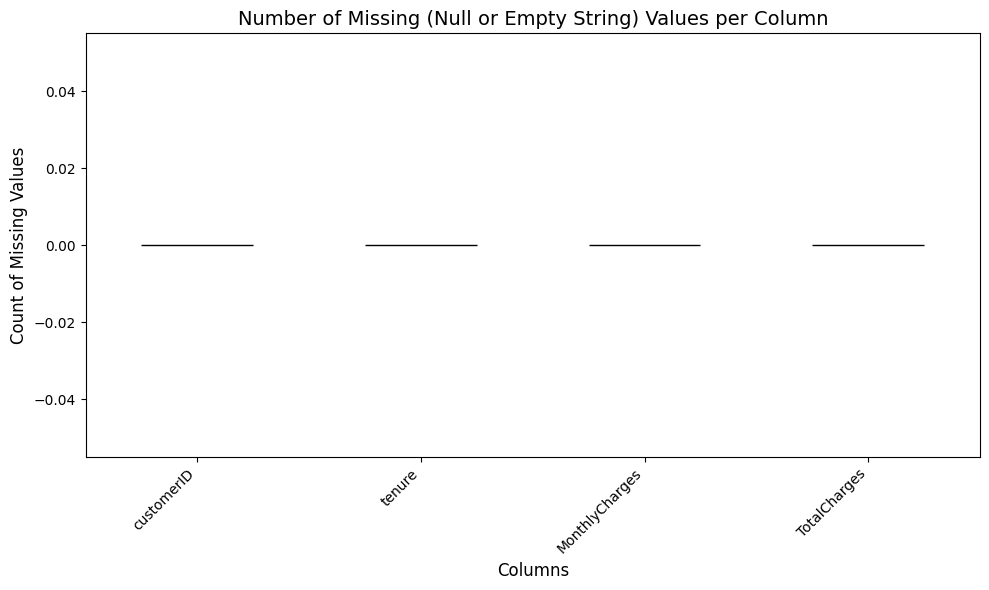

customerID        0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [18]:
# Strip whitespace and check again
df_stripped = db_data_dropped.map(lambda x: x.strip() if isinstance(x, str) else x)

# Count nulls or empty strings after stripping
null_counts = df_stripped.apply(lambda x: x.eq("").sum() + x.isnull().sum())

# Sort descending
null_counts = null_counts.sort_values(ascending=False)

# Plot again
plt.figure(figsize=(10,6))
null_counts.plot(kind='bar', color='salmon', edgecolor='black')

plt.title("Number of Missing (Null or Empty String) Values per Column", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Count of Missing Values", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

null_counts.head()


## 5. Merging both sources of data

In [11]:
df = pd.merge(csv_data, db_data_dropped, how='inner', on='customerID')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,No,1,29.85,29.85
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,No,34,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,Yes,2,53.85,108.15
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),No,45,42.30,1840.75
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,Yes,2,70.70,151.65
5,9305-CDSKC,Female,0,No,No,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,8,99.65,820.5
6,1452-KIOVK,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No,22,89.10,1949.4
7,6713-OKOMC,Female,0,No,No,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,No,Mailed check,No,10,29.75,301.9
8,7892-POOKP,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,28,104.80,3046.05
9,6388-TABGU,Male,0,No,Yes,Yes,No,DSL,Yes,Yes,...,No,No,No,One year,No,Bank transfer (automatic),No,62,56.15,3487.95


# 2. Exploratory data analysis (EDA)

In [19]:
print(df['gender'].value_counts())
print(df['Churn'].value_counts())
print(df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count())
print(df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count())

gender
Male      3549
Female    3483
Name: count, dtype: int64
Churn
No     5163
Yes    1869
Name: count, dtype: int64
gender
Female    2544
Male      2619
Name: Churn, dtype: int64
gender
Female    939
Male      930
Name: Churn, dtype: int64


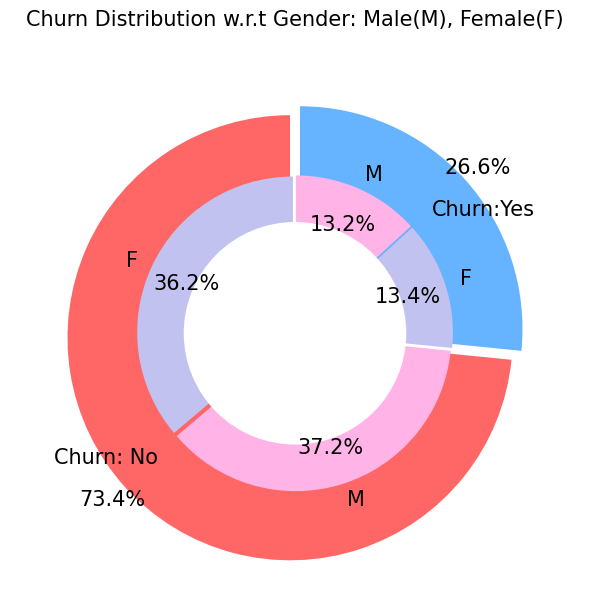

In [20]:
plt.figure(figsize=(6, 6))
labels =["Churn: No","Churn:Yes"]
values = [5163,1869]
labels_gender = ["F","M","F","M"]
sizes_gender = [2544,2619,939,930]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,autopct='%1.1f%%',pctdistance=0.75,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [21]:
print(df['SeniorCitizen'].value_counts())
print(df['Churn'].value_counts())
print(df["Churn"][df["Churn"]=="No"].groupby(by=df["SeniorCitizen"]).count())
print(df["Churn"][df["Churn"]=="Yes"].groupby(by=df["SeniorCitizen"]).count())

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
Churn
No     5163
Yes    1869
Name: count, dtype: int64
SeniorCitizen
0    4497
1     666
Name: Churn, dtype: int64
SeniorCitizen
0    1393
1     476
Name: Churn, dtype: int64


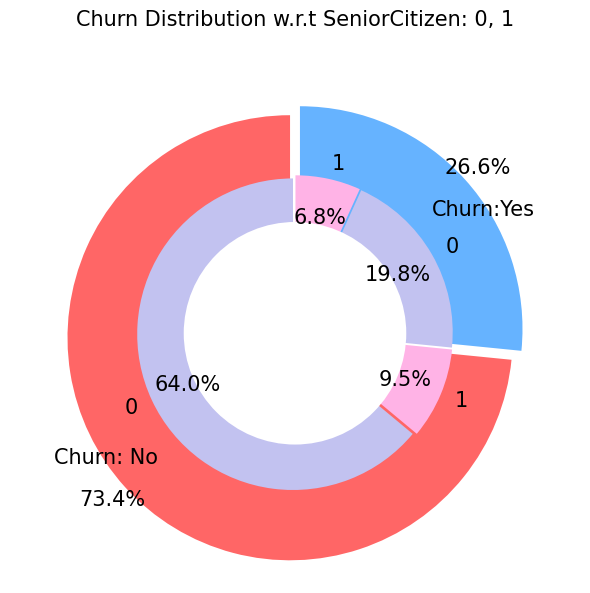

In [22]:
plt.figure(figsize=(6, 6))
labels =["Churn: No","Churn:Yes"]
values = [5163,1869]
labels_s_citizen = ["0","1","0","1"]
sizes_s_citizen = [4497,666 , 1393,476]
colors = ['#ff6666', '#66b3ff']
colors_s_citizen = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_s_citizen = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_s_citizen,labels=labels_s_citizen,autopct='%1.1f%%',pctdistance=0.75,colors=colors_s_citizen,startangle=90, explode=explode_s_citizen,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t SeniorCitizen: 0, 1', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [23]:
print(df['Partner'].value_counts())
print(df['Churn'].value_counts())
print(df["Churn"][df["Churn"]=="No"].groupby(by=df["Partner"]).count())
print(df["Churn"][df["Churn"]=="Yes"].groupby(by=df["Partner"]).count())

Partner
No     3639
Yes    3393
Name: count, dtype: int64
Churn
No     5163
Yes    1869
Name: count, dtype: int64
Partner
No     2439
Yes    2724
Name: Churn, dtype: int64
Partner
No     1200
Yes     669
Name: Churn, dtype: int64


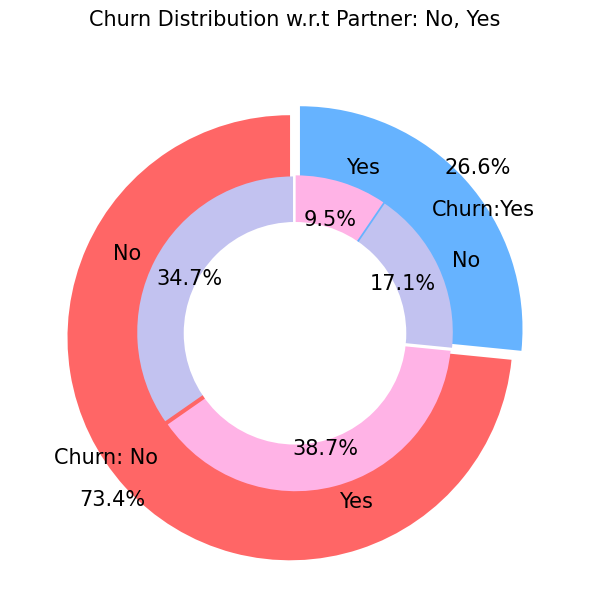

In [24]:
plt.figure(figsize=(6, 6))
labels =["Churn: No","Churn:Yes"]
values = [5163,1869]
labels_Partner = ["No","Yes","No","Yes"]
sizes_Partner = [2439,2724,1200,669]
colors = ['#ff6666', '#66b3ff']
colors_Partner = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_Partner = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_Partner,labels=labels_Partner,autopct='%1.1f%%',pctdistance=0.75,colors=colors_Partner,startangle=90, explode=explode_Partner,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Partner: No, Yes', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [26]:
print(df['Dependents'].value_counts())
print(df['Churn'].value_counts())
print(df["Churn"][df["Churn"]=="No"].groupby(by=df["Dependents"]).count())
print(df["Churn"][df["Churn"]=="Yes"].groupby(by=df["Dependents"]).count())

Dependents
No     4933
Yes    2099
Name: count, dtype: int64
Churn
No     5163
Yes    1869
Name: count, dtype: int64
Dependents
No     3390
Yes    1773
Name: Churn, dtype: int64
Dependents
No     1543
Yes     326
Name: Churn, dtype: int64


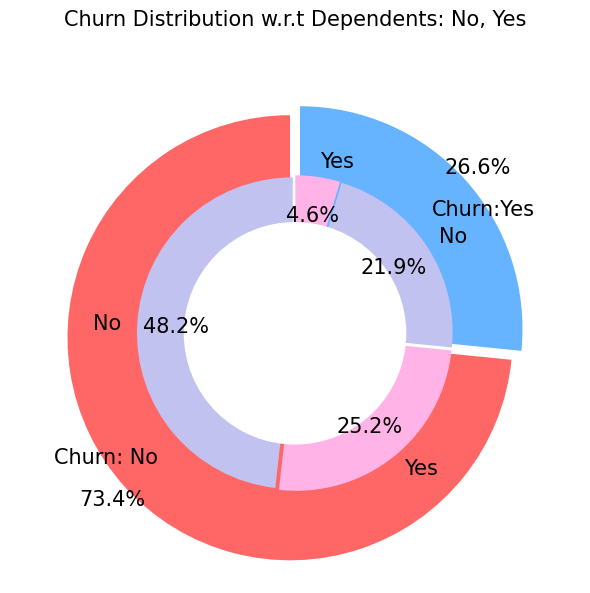

In [27]:
plt.figure(figsize=(6, 6))
labels =["Churn: No","Churn:Yes"]
values = [5163,1869]
labels_Dependents = ["No","Yes","No","Yes"]
sizes_Dependents = [3390,1773,1543,326]
colors = ['#ff6666', '#66b3ff']
colors_Dependents = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_Dependents = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_Dependents,labels=labels_Dependents,autopct='%1.1f%%',pctdistance=0.75,colors=colors_Dependents,startangle=90, explode=explode_Dependents,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Dependents: No, Yes', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [28]:
print(df['PhoneService'].value_counts())
print(df['Churn'].value_counts())
print(df["Churn"][df["Churn"]=="No"].groupby(by=df["PhoneService"]).count())
print(df["Churn"][df["Churn"]=="Yes"].groupby(by=df["PhoneService"]).count())

PhoneService
Yes    6352
No      680
Name: count, dtype: int64
Churn
No     5163
Yes    1869
Name: count, dtype: int64
PhoneService
No      510
Yes    4653
Name: Churn, dtype: int64
PhoneService
No      170
Yes    1699
Name: Churn, dtype: int64


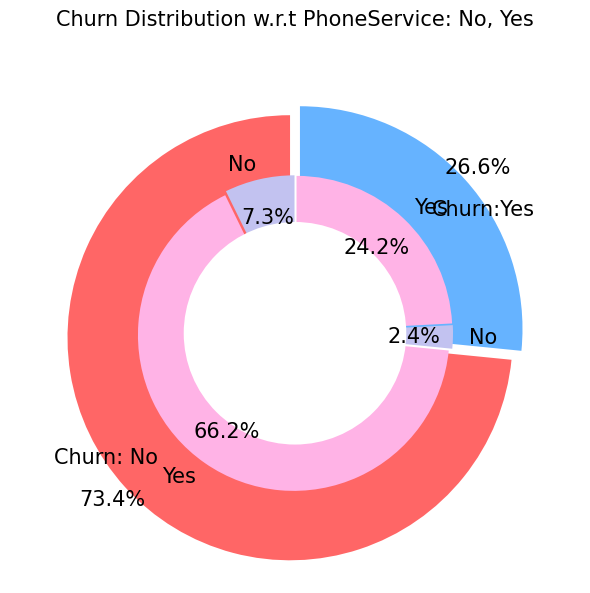

In [29]:
plt.figure(figsize=(6, 6))
labels =["Churn: No","Churn:Yes"]
values = [5163,1869]
labels_PhoneService = ["No","Yes","No","Yes"]
sizes_PhoneService = [510,4653,170,1699]
colors = ['#ff6666', '#66b3ff']
colors_PhoneService = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_PhoneService = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_PhoneService,labels=labels_PhoneService,autopct='%1.1f%%',pctdistance=0.75,colors=colors_PhoneService,startangle=90, explode=explode_PhoneService,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t PhoneService: No, Yes', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [30]:
print(df['PaperlessBilling'].value_counts())
print(df['Churn'].value_counts())
print(df["Churn"][df["Churn"]=="No"].groupby(by=df["PaperlessBilling"]).count())
print(df["Churn"][df["Churn"]=="Yes"].groupby(by=df["PaperlessBilling"]).count())

PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64
Churn
No     5163
Yes    1869
Name: count, dtype: int64
PaperlessBilling
No     2395
Yes    2768
Name: Churn, dtype: int64
PaperlessBilling
No      469
Yes    1400
Name: Churn, dtype: int64


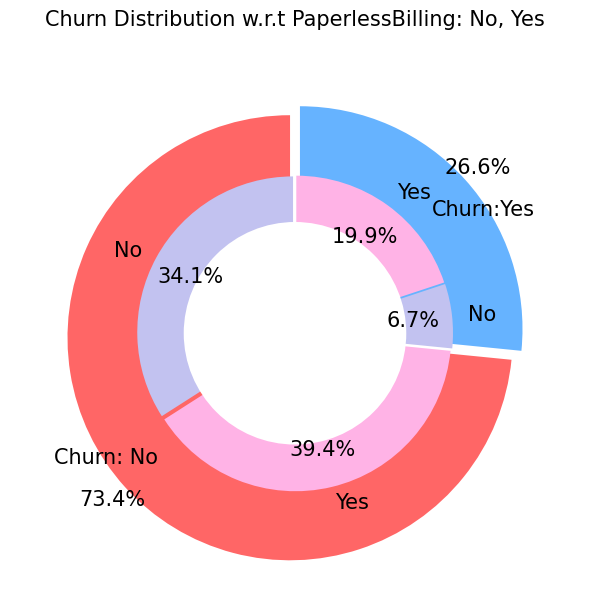

In [31]:
plt.figure(figsize=(6, 6))
labels =["Churn: No","Churn:Yes"]
values = [5163,1869]
labels_PaperlessBilling = ["No","Yes","No","Yes",]
sizes_PaperlessBilling= [2395,2768,469,1400]
colors = ['#ff6666', '#66b3ff']
colors_PaperlessBilling = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_PaperlessBilling = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_PaperlessBilling,labels=labels_PaperlessBilling,autopct='%1.1f%%',pctdistance=0.75,colors=colors_PaperlessBilling,startangle=90, explode=explode_PaperlessBilling,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t PaperlessBilling: No, Yes', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [32]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [33]:
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Customer PhoneService distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=450, bargap=0.1)
fig.show()

In [34]:
fig = px.histogram(df, x="Churn", color="MultipleLines", title="<b>Customer MultipleLines w.r.t. Churn</b>")
fig.update_layout(width=700, height=450, bargap=0.1)
fig.show()

In [35]:
fig = px.histogram(df, x="Churn", color="InternetService", title="<b>Customer InternetService w.r.t. Churn</b>")
fig.update_layout(width=700, height=450, bargap=0.1)
fig.show()

In [36]:
fig = px.histogram(df, x="Churn", color="OnlineSecurity", title="<b>Customer OnlineSecurity w.r.t. Churn</b>")
fig.update_layout(width=700, height=450, bargap=0.1)
fig.show()

In [37]:
fig = px.histogram(df, x="Churn", color="OnlineBackup", title="<b>Customer OnlineBackup w.r.t. Churn</b>")
fig.update_layout(width=700, height=450, bargap=0.1)
fig.show()

In [38]:
fig = px.histogram(df, x="Churn", color="DeviceProtection", title="<b>Customer DeviceProtection w.r.t. Churn</b>")
fig.update_layout(width=700, height=450, bargap=0.1)
fig.show()

In [39]:
fig = px.histogram(df, x="Churn", color="TechSupport", title="<b>Customer TechSupport w.r.t. Churn</b>")
fig.update_layout(width=700, height=450, bargap=0.1)
fig.show()

In [40]:
fig = px.histogram(df, x="Churn", color="StreamingTV", title="<b>Customer StreamingTV w.r.t. Churn</b>")
fig.update_layout(width=700, height=450, bargap=0.1)
fig.show()

In [41]:
fig = px.histogram(df, x="Churn", color="StreamingMovies", title="<b>Customer StreamingMovies distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=450, bargap=0.1)
fig.show()

In [42]:
fig = px.histogram(df, x="Churn", color="Contract", title="<b>Customer Contract distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=450, bargap=0.1)
fig.show()

In [36]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer PaymentMethod distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=450, bargap=0.1)
fig.show()

# 3. Splitting, encoding and model building

### 1. Splitting the dataset

In [45]:
df.to_csv("cleaned_processed_data.csv", index=False)

In [38]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

X = df.drop(columns = ['customerID', 'Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40, stratify=y)

### 2. Encoding categorical and numerical columns and preparing dataset for model training

In [40]:
# encoding train dataset

# encoding categorical variables
X_train_categorical = X_train.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth', 'ExtraCharges',  'LifetimeValue',  'Tenure_Charges_Interaction'])
# Force one-hot encoded columns to be integers (0/1)
X_train_categorical_encoded = pd.get_dummies(X_train_categorical, dtype=int)

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth', 'ExtraCharges',  'LifetimeValue',  'Tenure_Charges_Interaction']

# Scale while keeping index
scaler = StandardScaler()
X_train_numerical = pd.DataFrame(
    scaler.fit_transform(X_train[num_cols]),
    columns=num_cols,
    index=X_train.index
)

# Combine
X_train_encoded = pd.concat([X_train_categorical_encoded, X_train_numerical], axis=1)
X_train_encoded.head(10)

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
980,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,-1.281139,0.726146,-0.970138
6556,0,1,1,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,1.170193,1.381503,1.809078
2207,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,1,-0.913439,-1.517446,-0.908597
2521,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,1,-1.281139,-1.520790,-0.999837
2746,1,0,1,0,0,1,0,1,1,0,...,0,0,1,0,0,0,1,-0.545739,-1.338561,-0.816253
1534,1,0,1,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,-1.158572,-0.487601,-0.912464
967,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,-1.281139,0.858221,-0.968392
2737,0,1,1,0,1,0,1,0,0,1,...,1,1,0,1,0,0,0,1.374471,0.129304,0.957163
6548,1,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0.026238,1.174196,0.459113
1020,1,0,0,1,0,1,1,0,0,1,...,0,0,1,0,0,1,0,0.516505,0.709428,0.698139


<Axes: >

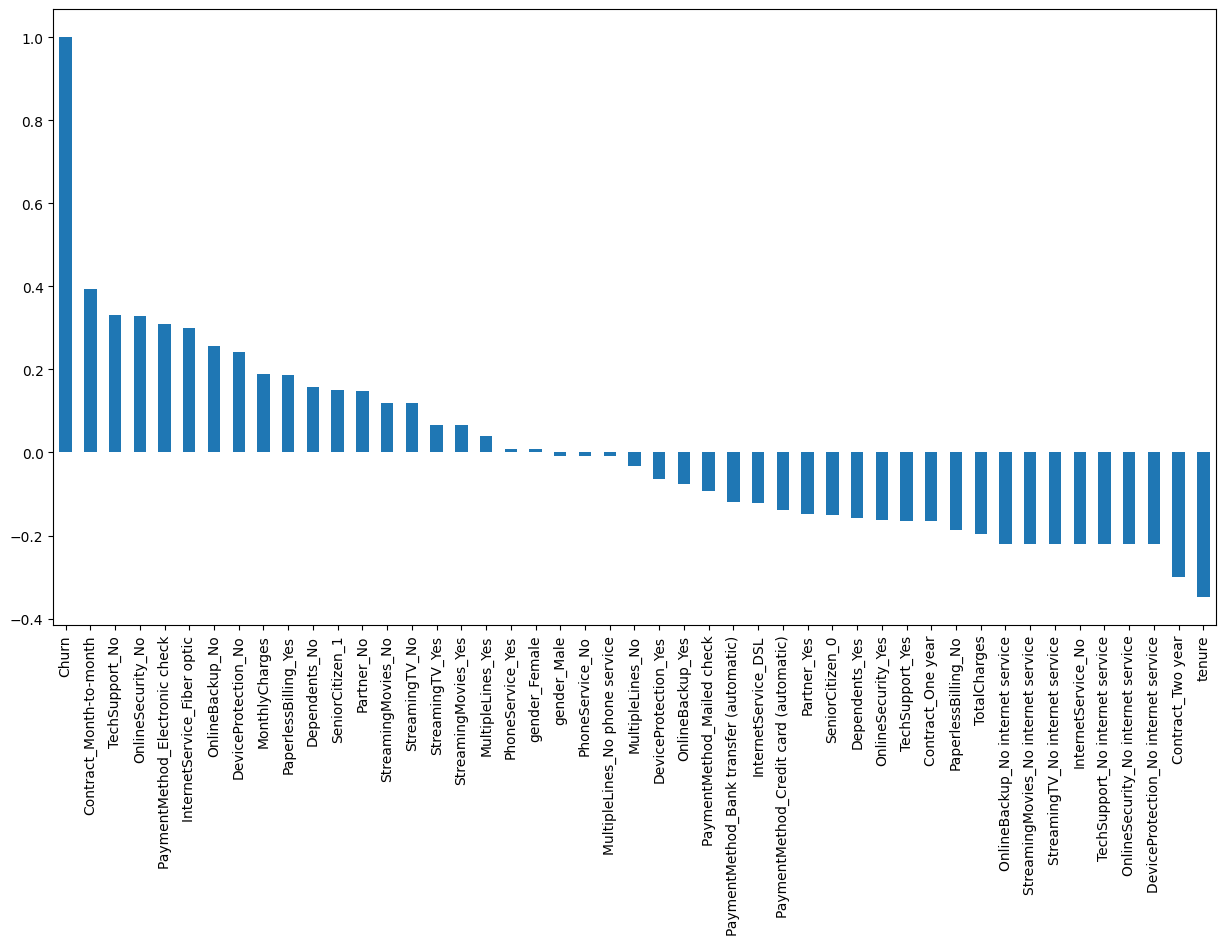

In [41]:
X_train_encoded_corr = pd.concat([X_train_categorical_encoded, X_train_numerical, y_train], axis=1)
X_train_encoded_corr.head(10)

#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
X_train_encoded_corr.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [42]:
# preparing test dataset

# encoding categorical variables
X_test_categorical = X_test.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
# Force one-hot encoded columns to be integers (0/1)
X_test_categorical_encoded = pd.get_dummies(X_test_categorical, dtype=int)

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

# Scale while keeping index
scaler = StandardScaler()
X_test_numerical_std = pd.DataFrame(
    scaler.fit_transform(X_test[num_cols]),
    columns=num_cols,
    index=X_test.index
)

# Combine
X_test_encoded = pd.concat([X_test_categorical_encoded, X_test_numerical_std], axis=1)
X_test_encoded.head(10)

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
5701,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1.515432,1.505361,2.401580
2508,0,1,1,0,0,1,0,1,0,1,...,1,1,0,0,0,0,1,0.786643,-1.489010,-0.541453
1075,1,0,0,1,1,0,1,0,0,1,...,1,0,1,0,1,0,0,1.070061,0.478813,1.012216
5702,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,-0.508982,0.859259,-0.147609
6565,1,0,0,1,1,0,1,0,0,1,...,0,0,1,0,0,1,0,-0.954353,0.836301,-0.646017
3469,1,0,1,0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,-1.237771,-1.452933,-0.990930
2049,1,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,-1.237771,-0.498539,-0.958126
5784,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,-0.751911,-0.298477,-0.667659
6507,0,1,1,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,-1.278259,-0.513298,-0.983438
2411,0,1,1,0,1,0,1,0,0,1,...,0,0,1,1,0,0,0,-0.225564,1.177390,0.169861


# 4. Model building

In [43]:
import mlflow
import mlflow.sklearn
import os
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Ensure mlruns folder exists
os.makedirs("mlruns", exist_ok=True)

# Set local tracking URI
mlflow.set_tracking_uri("file:./mlruns")

# Create / set experiment
mlflow.set_experiment("Churn_Prediction")

# Train the model
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_encoded, y_train)

# Predictions
y_pred = svc.predict(X_test_encoded)
acc = accuracy_score(y_test, y_pred)

# Track run number
experiment = mlflow.get_experiment_by_name("Churn_Prediction")
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
run_number = len(runs) + 1   # run_1, run_2, ...

# MLflow logging
with mlflow.start_run(run_name=f"run_{run_number}"):
    mlflow.log_param("kernel", "rbf")
    mlflow.log_param("probability", True)
    mlflow.log_metric("accuracy", acc)

    mlflow.sklearn.log_model(
        sk_model=svc,
        artifact_path="svc_model",
        registered_model_name="Churn_SVC_Model"
    )

    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Logged to MLflow as run_{run_number} with Accuracy: {acc:.4f}")


2025/08/21 18:56:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/21 18:56:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.68      0.52      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110

Logged to MLflow as run_2 with Accuracy: 0.8085


Registered model 'Churn_SVC_Model' already exists. Creating a new version of this model...
Created version '2' of model 'Churn_SVC_Model'.


# 5. Distribution plots

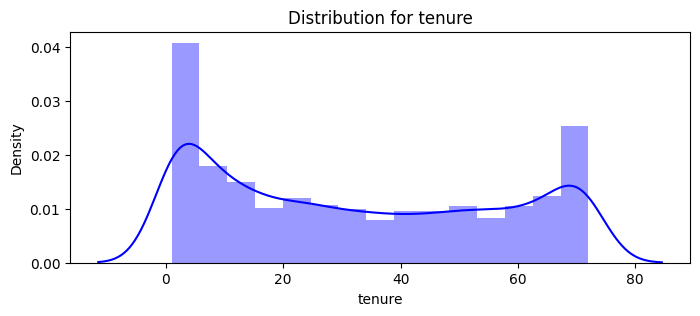

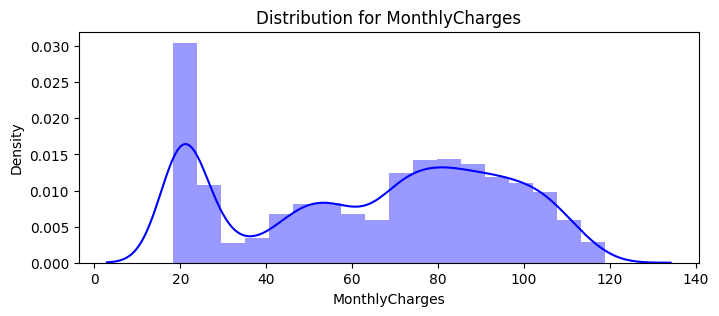

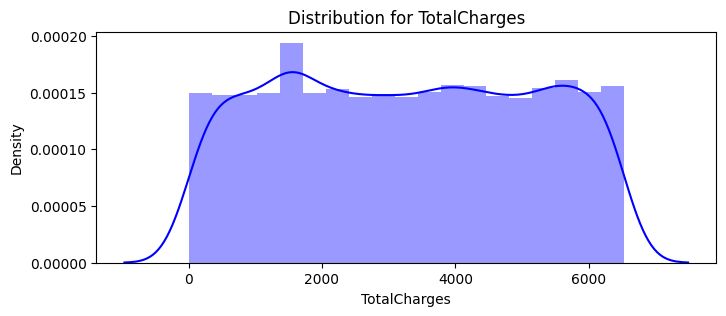

In [84]:
def distplot(feature, frame, color='b'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols:
    distplot(feat, merged_df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

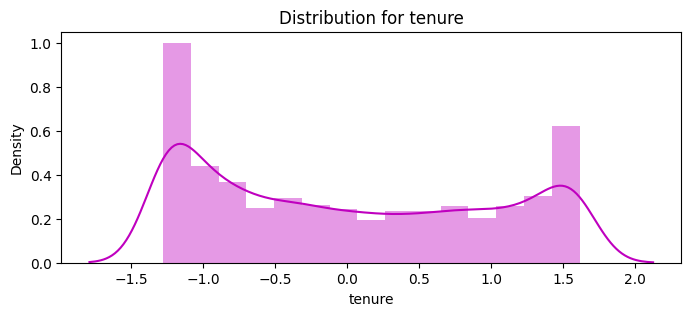

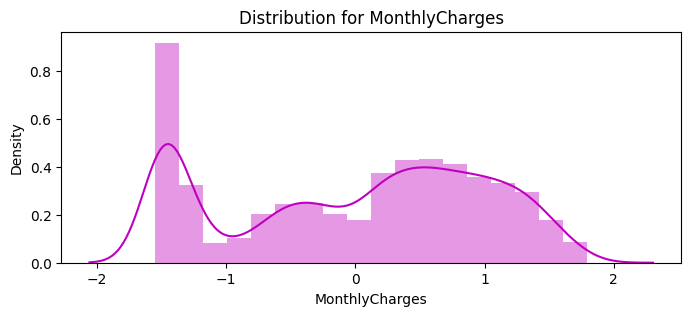

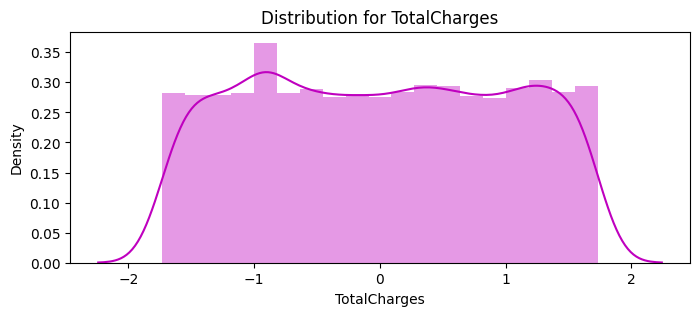

In [92]:
merged_df_numerical = pd.DataFrame(StandardScaler().fit_transform(merged_df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols:
    distplot(feat, merged_df_numerical, color='m')